In [1]:
import pandas as pd
import matplotlib.cm as cm

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('apartments.csv', decimal=",", thousands=".")
len(df)

3322

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 17 columns):
address         2762 non-null object
city            3322 non-null object
contact_name    2632 non-null object
district        3322 non-null object
immo_id         3322 non-null int64
lat             2712 non-null float64
lng             2712 non-null float64
media_count     3322 non-null int64
rent            3322 non-null float64
rooms           3322 non-null float64
sqm             3322 non-null float64
time_dest       0 non-null float64
time_dest2      0 non-null float64
time_dest3      0 non-null float64
title           3322 non-null object
url             3322 non-null object
zip_code        3322 non-null int64
dtypes: float64(8), int64(3), object(6)
memory usage: 441.3+ KB


In [5]:
df.head()

,address,city,contact_name,district,immo_id,lat,lng,media_count,rent,rooms,sqm,time_dest,time_dest2,time_dest3,title,url,zip_code
0,Ackerstraße 5,Berlin,Udo Schultze,Spandau (Spandau),106255490,52.54820,13.19798,9,880.0,2.5,84.00,NaN,NaN,NaN,Exclusive Albauwohnung - saniert,https://www.immobilienscout24.de/expose/106255490,13585
1,Damerowstr. 9A,Berlin,Christian Haupt,Pankow (Pankow),105400845,52.57232,13.41812,16,849.0,3.0,67.73,NaN,NaN,NaN,3 Zimmer Maisonette in Pankow,https://www.immobilienscout24.de/expose/105400845,13187
2,NaN,Berlin,Sylvie Winckel,Wilmersdorf (Wilmersdorf),105576950,NaN,NaN,48,2630.0,3.0,210.40,NaN,NaN,NaN,Erstbezug – TOP Lage am Ku’damm – sehr repräse...,https://www.immobilienscout24.de/expose/105576950,10709
3,Lehrter Straße 25,Berlin,Hans-Joachim Kredelbach,Tiergarten (Tiergarten),106238652,52.53251,13.36062,29,1779.0,4.0,106.10,NaN,NaN,NaN,Moderner Neubau Erstbezug. 4 Zimmer Wohnung. H...,https://www.immobilienscout24.de/expose/106238652,10557
4,Klara Franke Straße 12,Berlin,Bastian Schätzle,Tiergarten (Tiergarten),106365195,NaN,NaN,9,690.0,4.0,20.00,NaN,NaN,NaN,Major Balcony Room // Co-Living - fully furnis...,https://www.immobilienscout24.de/expose/106365195,10557


## Data Cleansing

In [6]:
df.immo_id = df.immo_id.astype(str)
df.zip_code = df.zip_code.astype(str)
df2=df.drop(columns=["time_dest", "time_dest2", "time_dest3"])
df2.describe()

,lat,lng,media_count,rent,rooms,sqm
count,2712.000000,2712.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,52.509916,13.391916,11.460265,1125.504874,2.597772,82.820111
std,0.045428,0.103347,7.495161,811.660058,1.172697,45.748865
min,52.376190,13.127430,0.000000,223.000000,1.000000,1.000000
25%,52.482728,13.328095,7.000000,610.000000,2.000000,55.000000
50%,52.511455,13.387490,10.000000,899.000000,2.000000,72.340000
75%,52.540433,13.450320,15.000000,1386.000000,3.000000,100.000000
max,52.645320,13.667430,88.000000,12000.000000,11.000000,482.000000


## Interesting statistics
### Providers with most apartment offers

In [7]:
df2.groupby("contact_name").size().sort_values(ascending=False)

contact_name
Engel & Völkers Berlin Mitte                              64
Telefonist ADEN Immo                                      48
BIDDEX IMMOBILIEN                                         39
Vermietungsteam Stadthaus Verwaltungsgesellschaft         36
Bastian Schätzle                                          36
Jürgen Schmidt                                            26
Seraphina Behrens                                         25
Manuela von Mallinckrodt                                  24
Michael Berndt                                            24
Sandy Ecke                                                22
Steffen Pauluth                                           21
Sandra Linke                                              20
Benjamin Nudelmann                                        20
Ihr Makler in Berlin!                                     19
Nancy  Luftmann / Eastside                                19
Jörg-M. Meier                                             19
EuV Residen

### Districts with most apartment offers

In [8]:
df2.groupby("district").size().sort_values(ascending=False)

district
Mitte (Mitte)                              294
Charlottenburg (Charlottenburg)            245
Friedrichshain (Friedrichshain)            239
Tiergarten (Tiergarten)                    216
Spandau (Spandau)                          182
Prenzlauer Berg (Prenzlauer Berg)          135
Wilmersdorf (Wilmersdorf)                  133
Wedding (Wedding)                          127
Schöneberg (Schöneberg)                    119
Neukölln (Neukölln)                        115
Kreuzberg (Kreuzberg)                      102
Reinickendorf (Reinickendorf)               77
Köpenick (Köpenick)                         76
Hellersdorf (Hellersdorf)                   72
Lichterfelde (Steglitz)                     64
Pankow (Pankow)                             57
Weißensee (Weißensee)                       50
Lichtenberg (Lichtenberg)                   47
Steglitz (Steglitz)                         43
Oberschöneweide (Köpenick)                  38
Britz (Neukölln)                            37
Zehl

In [9]:
df3=df2[(df2.rent<2000) & (df2.sqm<200)]
len(df3)

3019

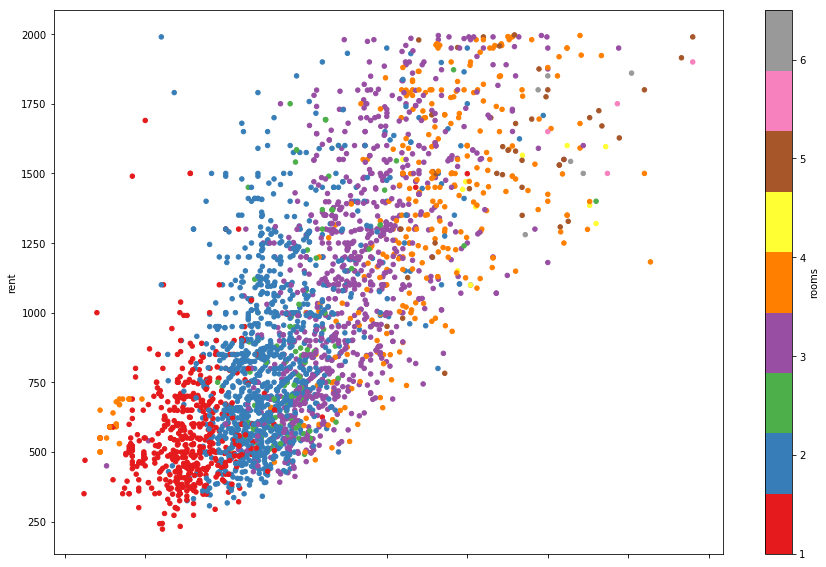

In [10]:
df3.plot(x="sqm", y="rent", c="rooms", kind="scatter", colormap=cm.Set1, figsize=(15,10))

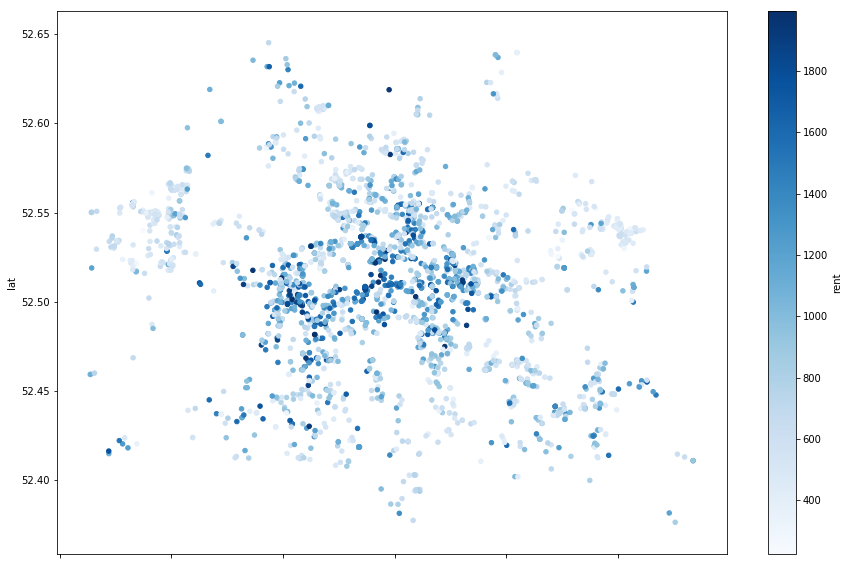

In [11]:
df3.plot(x="lng", y="lat", c="rent", kind="scatter", figsize=(15,10), colormap=cm.Blues)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120e5dcc0>,
      dtype=object)

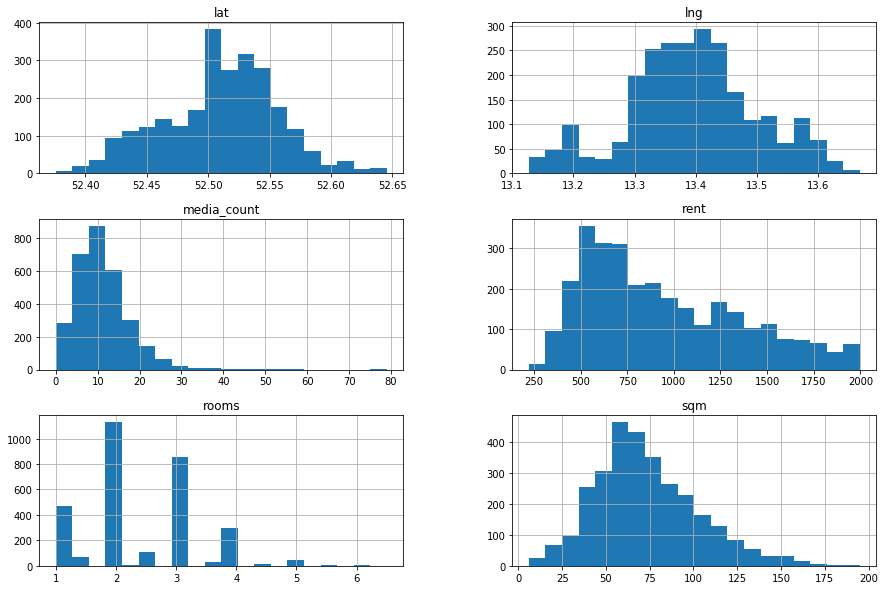

In [12]:
df3.hist(bins=20,figsize=(15,10))

In [13]:
corr=df3.corr()

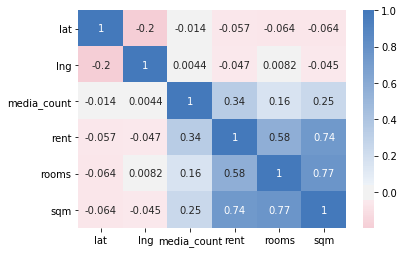

In [14]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, center=0.0, 
            cmap=sns.diverging_palette(5, 250, as_cmap=True), annot=True)

In [15]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [16]:
# One-hot encoding of zip_codes
hot_zip = pd.get_dummies(df3.zip_code)

In [17]:
X = pd.concat((df3[["sqm","rooms"]], hot_zip), axis=1)
y = df3[["rent"]]

In [18]:
X.shape

(3019, 196)

In [19]:
# Robustly fit linear model with RANSAC algorithm
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [20]:
regressor.fit(X,y)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [21]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

18.2% der Wohnungen als Ausreißer identifiziert


In [22]:
y_pred = regressor.predict(X)
df3["rent_predicted"] = y_pred

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


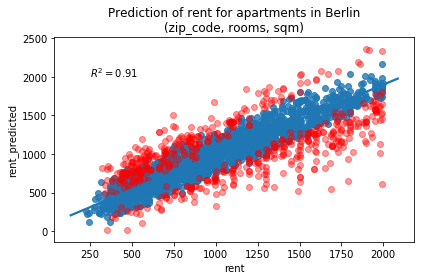

In [24]:
sns.regplot(df3['rent'][inlier_mask],
            df3['rent_predicted'][inlier_mask])
plt.scatter(df3['rent'][outlier_mask],
            df3['rent_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of rent for apartments in Berlin\n(zip_code, rooms, sqm)')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)